In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
data = pd.read_csv('FilteredData_MorrisLecar_I0_80.csv')
data = data.dropna()

# Use "Amp" and "L" as predictors and "l3max" as the target
X = data[['Amp', 'L', 'L1', 'L2', 'p2']].values
y = data[[ 'tnextmax']].values

In [3]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Define the Simple Neural Network model
model_v1 = Sequential([
    Dense(10, activation='relu', input_shape=(5,)),
    Dense(1)  # Output layer with linear activation for regression
])

In [9]:
# Compile the model using Mean Squared Error loss and Adam optimizer
model_v1.compile(optimizer='adam', loss='mse')

In [10]:
# View the model's architecture
model_v1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71 (284.00 B)

 Trainable params: 71 (284.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Train the model
history_v1 = model_v1.fit(X_train, y_train, epochs=100, batch_size=32,
                          validation_split=0.1, verbose=0)

In [12]:
# Evaluate the model on the test set
y_pred_v1 = model_v1.predict(X_test).flatten()
mse_v1 = mean_squared_error(y_test, y_pred_v1)
r2_v1 = r2_score(y_test, y_pred_v1)
print("Simple NN - Mean Squared Error: {:.2f}".format(mse_v1))
print("Simple NN - R^2 Score: {:.5f}".format(r2_v1))

1130/1130 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Simple NN - Mean Squared Error: 1.01
Simple NN - R^2 Score: 0.99859


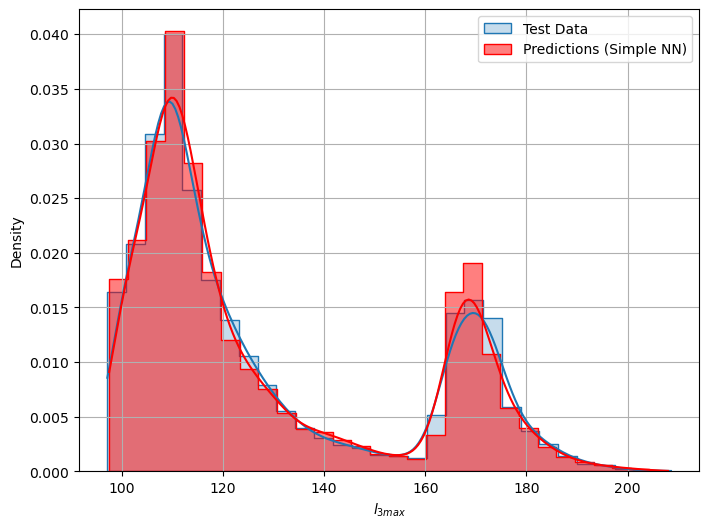

In [13]:
# Visualize Prediction Distribution vs. Test Data
plt.figure(figsize=(8,6))
sns.histplot(y_test, bins=30, kde=True, color='blue', label='Test Data', stat='density', element="step")
sns.histplot(y_pred_v1, bins=30, kde=True, color='red', label='Predictions (Simple NN)', stat='density', element="step")
plt.xlabel(r'$l_{3max}$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.savefig('Simple_NN_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


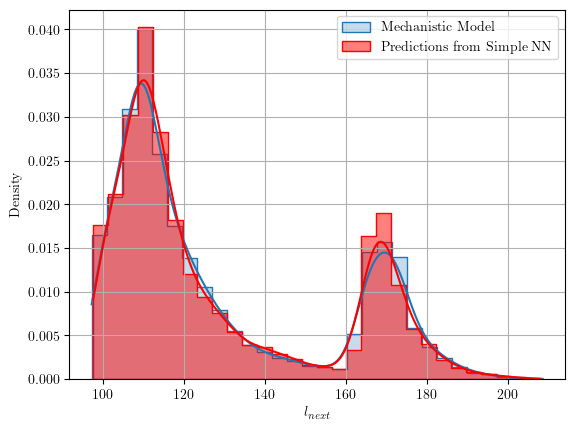

In [14]:
import matplotlib as mpl
# import matplotlib.pyplot as plt
# import seaborn as sns

#
mpl.rcParams['text.usetex'] = True                       # Enable full LaTeX rendering
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Computer Modern Roman']   # Use LaTeX default font
mpl.rcParams['axes.formatter.use_mathtext'] = False      # Disable mathtext formatting so LaTeX is used for all text
mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # Load amsmath for \text

###########
# Visualize Prediction Distribution vs. Test Data
# plt.figure(figsize=(8,6))

sns.histplot(y_test, bins=30, kde=True, color='blue', label='Mechanistic Model', stat='density', element="step")
sns.histplot(y_pred_v1, bins=30, kde=True, color='red', label='Predictions from Simple NN', stat='density', element="step")
plt.xlabel(r'$l_{next}$')
plt.ylabel(r'$\text{Density}$')
plt.legend()
plt.grid(True)
plt.savefig('Simple_NN_comparison2.png', dpi=300, bbox_inches='tight')
plt.show()